In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [7]:
df.shape

(891, 12)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#let's fill Age column with mean
df["Age"]=df["Age"].fillna(df["Age"].mean())

In [11]:
#let's fill Embarked column with most common value
df["Embarked"]=df["Embarked"].fillna(df["Embarked"].mode()[0])

In [13]:
#let's fill Cabin column with most common value
df["Cabin"]=df["Cabin"].fillna(df["Cabin"].mode()[0])

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
df["Pclass"] = df["Pclass"].apply(str)

In [17]:
#Getting dummies from all categorical variables
for col in df.dtypes[df.dtypes=="object"].index:
    for_dummy = df.pop(col)
    df = pd.concat([df , pd.get_dummies(for_dummy , prefix = col)] , axis = 1)
df.head()    

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,"Name_Abbing, Mr. Anthony",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,22.0,1,0,7.2500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,38.0,1,0,71.2833,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,3,1,26.0,0,0,7.9250,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,4,1,35.0,1,0,53.1000,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,35.0,0,0,8.0500,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
#here u can see that dummy colums are created for all the categorical ( that contain string as data type) columns

In [21]:
labels = df.pop("Survived")  # survived is our target column(output) so we put labels inplace of y

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

In [26]:
# Initialize RandomForestClassifier with specific hyperparameters
rf = RandomForestClassifier(
    max_depth=20,                    # Maximum depth of each tree in the forest. Controls overfitting.
    min_samples_split=5,             # Minimum number of samples required to split an internal node.
    min_samples_leaf=2,              # Minimum number of samples required to be at a leaf node.
    max_features='sqrt',             # Number of features to consider for the best split. 'sqrt' is typically used for classification.
    bootstrap=True,                  # Whether bootstrap samples are used when building trees. True means sampling with replacement.
    class_weight=None,               # Weights associated with classes. None means all classes are weighted equally.
    criterion='gini',                # Function to measure the quality of a split. 'gini' for the Gini impurity.
    min_weight_fraction_leaf=0.0,    # Minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    n_jobs=-1,                       # Number of jobs to run in parallel. -1 means using all available processors.
    verbose=0,                       # Controls the verbosity when fitting and predicting. 0 means no output.
    warm_start=False                 # Whether to reuse the previous solution to fit the new model.
)


In [40]:
# Initialize the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Fit the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Make predictions on the test data
y_pred=rf.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83


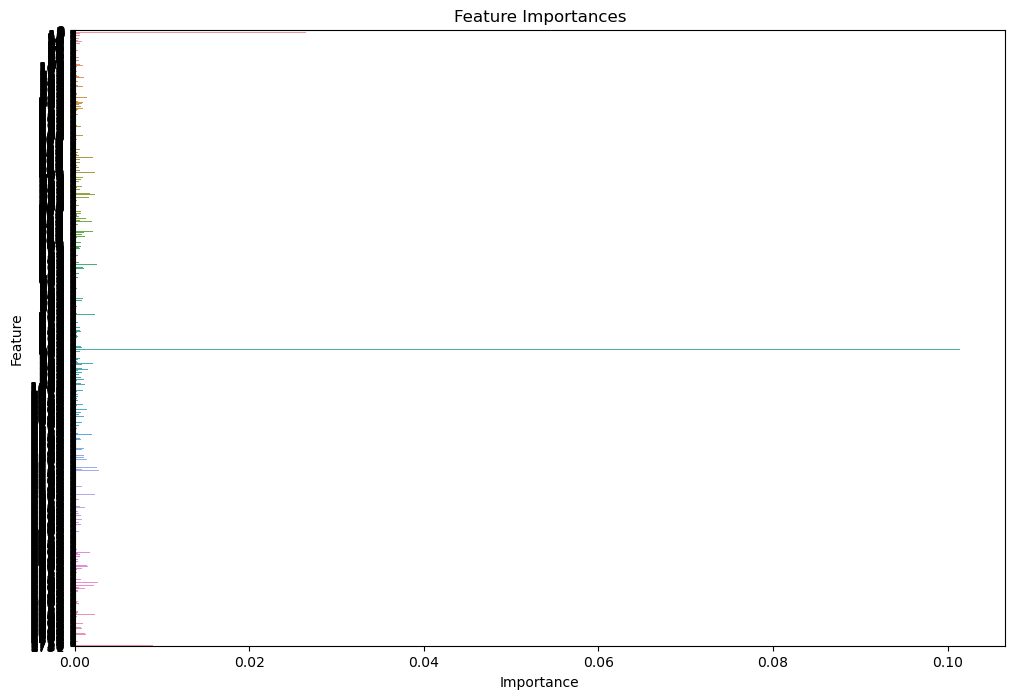

In [47]:
import seaborn as sns

# Get feature importances
importances = rf.feature_importances_
# Create a DataFrame for better plotting
importances_df = pd.DataFrame({
    'Feature': range(len(importances)),  # Feature indices
    'Importance': importances
})
# Sort the DataFrame by feature importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df, orient='h')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
